In [ ]:
#Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

In [173]:
#Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. 
#libraries for data manipulation
import pandas as pd 
import numpy as np

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Command to tell Python to actually display the graphs
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

# importing the datasets
data1 = pd.read_csv("Data1.csv")
data2 = pd.read_csv("Data2.csv")

# printing the dataset to verify if the import was successful
print(data1,"\n", data2)

        ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  MonthlyAverageSpend  Level
0        1   25              1            49    91107            4                 1.60      1
1        2   45             19            34    90089            3                 1.50      1
2        3   39             15            11    94720            1                 1.00      1
3        4   35              9           100    94112            1                 2.70      2
4        5   35              8            45    91330            4                 1.00      2
...    ...  ...            ...           ...      ...          ...                  ...    ...
4995  4996   29              3            40    92697            1                 1.90      3
4996  4997   30              4            15    92037            4                 0.40      1
4997  4998   63             39            24    93023            2                 0.30      3
4998  4999   65             40            49    90

In [174]:
#Print shape and Column Names and DataTypes of both the Dataframes
s_data1 = data1.shape
s_data2 = data2.shape
print(f"Data1 has {s_data1[0]} rows and {s_data1[1]} columns.\nData2 has {s_data2[0]} rows and {s_data2[1]} columns.")

Data1 has 5000 rows and 8 columns.
Data2 has 5000 rows and 7 columns.


In [175]:
data1_c = data1.columns
data2_c = data2.columns
print("Columns of data1 are",data1_c)
print("Columns of data2 are",data2_c)
    

Columns of data1 are Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore', 'MonthlyAverageSpend', 'Level'], dtype='object')
Columns of data2 are Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'], dtype='object')


In [176]:
print("Data1 has datatypes as follows,")
print(data1.dtypes)
print("*"*20)
print("Data2 has datatypes as follows,")
print(data2.dtypes)

Data1 has datatypes as follows,
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object
********************
Data2 has datatypes as follows,
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [177]:
#Merge both the Dataframes on ‘ID’ feature to form a single DataFrame
comb_data = data1.merge(data2, on='ID')
comb_data.head()


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.60,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.50,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,1,NaN


In [178]:
#Change Datatype of below features to ‘Object ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’
comb_data[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']] = comb_data[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']].astype('object')
comb_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

### Data Exploration and Analysis


Text(0.5, 1.0, 'Distribution of Loan on card')

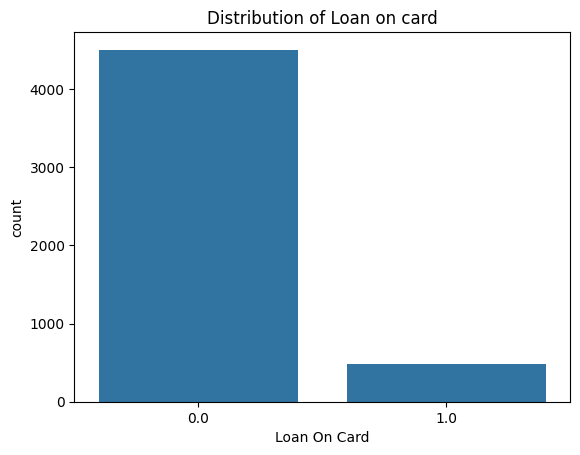

In [179]:
#Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights
sns.countplot(comb_data, x="LoanOnCard")

plt.xlabel("Loan On Card")
plt.title("Distribution of Loan on card")

There are large number of customers with No Loan on card compared to small number of customers with Loan on card.

In [180]:
#Check the percentage of missing values and impute if required
missing_value_perc = comb_data.isnull().sum()*100/len(comb_data)
print(missing_value_perc)

ID                    0.00
Age                   0.00
CustomerSince         0.00
HighestSpend          0.00
ZipCode               0.00
HiddenScore           0.00
MonthlyAverageSpend   0.00
Level                 0.00
Mortgage              0.00
Security              0.00
FixedDepositAccount   0.00
InternetBanking       0.00
CreditCard            0.00
LoanOnCard            0.40
dtype: float64


As LoanOnCard column has missing values we will impute them with median of the column.

In [181]:
comb_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

In [182]:
comb_data_imputed = comb_data.copy()

In [183]:
print(comb_data_imputed["CreditCard"].unique())
print(comb_data_imputed["InternetBanking"].unique())
print(comb_data_imputed["FixedDepositAccount"].unique())
print(comb_data_imputed["Security"].unique())
print(comb_data_imputed["Level"].unique())
print(comb_data_imputed["HiddenScore"].unique())

[0 1]
[0 1]
[0 1]
[1 0]
[1 2 3]
[4 3 1 2]


**Except the Level and HiddenScore column all other fetaures are portraying YES or NO information, example if a customer has credit card it is "1" and if not it is "0", however in the two features mentioned the are identified as the unique scoring for each customer. So we wont be imputing them as there levels are corelated to our target variable.**

In [184]:
categorical_variables = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security']

for var in categorical_variables:
    unique_values = comb_data_imputed[var].unique()
    
    print(f"unique_values in '{var}': {unique_values}")
        
    unexpected_values = [value for value in unique_values if value not in [0, 1]]
   
    
    if unexpected_values:
        print(f"Unexpected values in '{var}': {unexpected_values}")
        
        comb_data_imputed[var] = comb_data_imputed[var].replace(unexpected_values, np.nan)

rows_with_nan_target = comb_data_imputed[comb_data_imputed['LoanOnCard'].isnull()]

comb_data_imputed['LoanOnCard'].fillna(comb_data_imputed["LoanOnCard"].median(), inplace=True)  # Replace NaN with its median

unique_values in 'CreditCard': [0 1]
unique_values in 'InternetBanking': [0 1]
unique_values in 'FixedDepositAccount': [0 1]
unique_values in 'Security': [1 0]


**There are no values to be imputed.**
**The LoanOnCard has null values which are imputed with its median.**

In [185]:
missing_value_perc_imputed = comb_data_imputed.isnull().sum()*100/len(comb_data)
print(missing_value_perc_imputed)

ID                    0.00
Age                   0.00
CustomerSince         0.00
HighestSpend          0.00
ZipCode               0.00
HiddenScore           0.00
MonthlyAverageSpend   0.00
Level                 0.00
Mortgage              0.00
Security              0.00
FixedDepositAccount   0.00
InternetBanking       0.00
CreditCard            0.00
LoanOnCard            0.00
dtype: float64


**Data Preparation and model building:**

In [186]:
comb_data_imputed.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore', 'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'], dtype='object')

In [187]:
#Split data into X and Y
comb_data_imputed_1 = comb_data_imputed.copy()
X = comb_data_imputed_1.drop(['ID', 'ZipCode', 'LoanOnCard'], axis=1)
Y = comb_data_imputed_1["LoanOnCard"]

In [188]:
#Split data into train and test. Keep 25% data reserved for testing. 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [189]:
#Train a Supervised Learning Classification base model - Logistic Regression.
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(max_iter=10000)
lm.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [190]:
#Print evaluation metrics for the model and clearly share insights
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Y_pred_test = lm.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred_test) 
precision = precision_score(Y_test, Y_pred_test) 
recall = recall_score(Y_test, Y_pred_test) 
f1 = f1_score(Y_test, Y_pred_test) 
confusion = confusion_matrix(Y_test, Y_pred_test) 

# Print metrics and insights
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.95
Precision: 0.86
Recall: 0.63
F1-Score: 0.72
Confusion Matrix:
[[1102   14]
 [  50   84]]


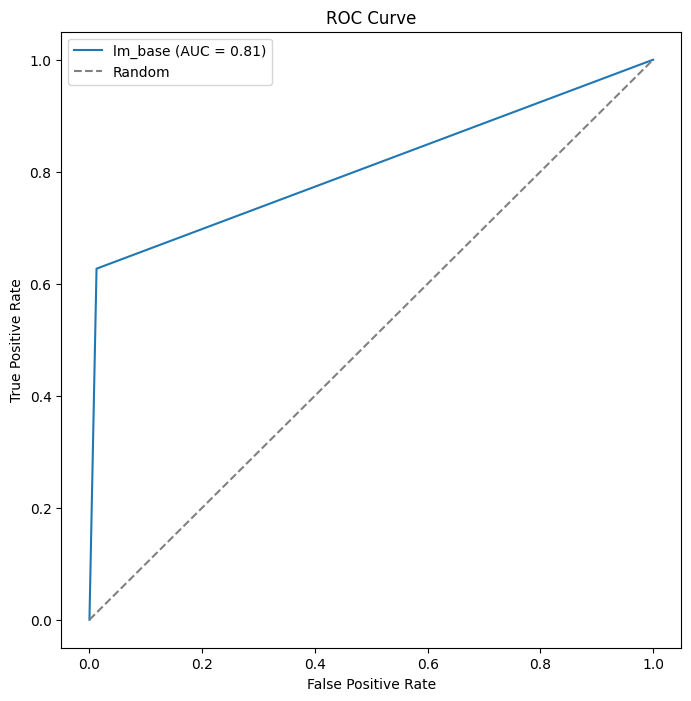

In [191]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_scores, label='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


plot_roc_curve(Y_test, Y_pred_test, label='lm_base')

**5) Balance the data using the right balancing technique.**

In [192]:
!pip install imbalanced-learn


In [193]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Check the distribution of the target variable
class_A_count = (Y_train == 0).sum()
class_B_count = (Y_train == 1).sum()

# Calculate the balanced count
balanced_count = min(class_A_count, class_B_count)

if class_A_count < class_B_count:
    # If class A is the minority class, oversample it
    sampler = RandomOverSampler(sampling_strategy=balanced_count / class_A_count, random_state=42)
    X_train_resampled, Y_train_resampled = sampler.fit_resample(X_train, Y_train)
else:
    # If class B is the minority class, undersample it
    under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    X_train_resampled, Y_train_resampled = under_sampler.fit_resample(X_train, Y_train)

In [194]:
countA =(class_A_count*100)/len(Y_train)
countB=(class_B_count*100)/len(Y_train)
print(f"Class A output is {countA: .2f}%")
print(f"Class B output is {countB: .2f}%")

Class A output is  90.77%
Class B output is  9.23%


In [195]:
#balance the target variable as 50:50.
Y_train_resampled.value_counts()

LoanOnCard
0.00    346
1.00    346
Name: count, dtype: int64

In [196]:
#Again train the same previous model on balanced data
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train_resampled, Y_train_resampled)

LogisticRegression(max_iter=10000)

In [197]:
#Print evaluation metrics and clearly share differences observed. 
Y_pred = logistic_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred) 
precision = precision_score(Y_test, Y_pred) 
recall = recall_score(Y_test, Y_pred) 
f1 = f1_score(Y_test, Y_pred) 
confusion = confusion_matrix(Y_test, Y_pred) 

# Print metrics and insights
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.89
Precision: 0.50
Recall: 0.90
F1-Score: 0.64
Confusion Matrix:
[[994 122]
 [ 13 121]]


* Accuracy has reduced from 95% to 89%.
* Precision has plunged to 50% from 86%.
* Recall has upgraded from 63% to 90%.
* F1-Score has reduced from 72% to 64%.
* The Type 1 error or False positives have reduced to 13 from 50.

## Performance Improvement

In [198]:
#Train a base model each for SVM, KNN
# SVM Model
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_resampled, Y_train_resampled)

SVC(kernel='linear', random_state=42)

In [199]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_resampled, Y_train_resampled)

KNeighborsClassifier()

In [200]:
#Tune parameters for each of the models wherever required and finalize a model.
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, Y_train_resampled)

# Get the best hyperparameters
best_svm_model = grid_search.best_estimator_


print(best_svm_model)

SVC(C=0.1, gamma=0.1, kernel='linear', random_state=42)


In [201]:
# Using hyperparameters for KNN Model
# Define the hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, Y_train_resampled)

# Get the best hyperparameters
best_knn_model = grid_search.best_estimator_
print(best_knn_model)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')


In [202]:
# Evaluate SVM model
Y_pred_svm = best_svm_model.predict(X_test)

# Evaluate KNN model
Y_pred_knn = best_knn_model.predict(X_test)


In [203]:
#Print evaluation metrics for final model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the SVM model
Y_pred_svm = best_svm_model.predict(X_test)

# Calculate metrics for the SVM model
accuracy_svm = accuracy_score(Y_test, Y_pred_svm) 
precision_svm = precision_score(Y_test, Y_pred_svm)
recall_svm = recall_score(Y_test, Y_pred_svm)
f1_svm = f1_score(Y_test, Y_pred_svm)
confusion_svm = confusion_matrix(Y_test, Y_pred_svm)

print("Evaluation Metrics for SVM Model:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1-Score: {f1_svm:.2f}")
print("Confusion Matrix:")
print(confusion_svm)

Evaluation Metrics for SVM Model:
Accuracy: 0.88
Precision: 0.48
Recall: 0.90
F1-Score: 0.62
Confusion Matrix:
[[985 131]
 [ 14 120]]


In [204]:
# Evaluate the KNN model
Y_pred_knn = best_knn_model.predict(X_test)

# Calculate metrics for the KNN model
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
precision_knn = precision_score(Y_test, Y_pred_knn)
recall_knn = recall_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn)
confusion_knn = confusion_matrix(Y_test, Y_pred_knn)

# Print metrics for both models


print("Evaluation Metrics for KNN Model:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}")
print("Confusion Matrix:")
print(confusion_knn)

Evaluation Metrics for KNN Model:
Accuracy: 0.83
Precision: 0.38
Recall: 0.90
F1-Score: 0.53
Confusion Matrix:
[[921 195]
 [ 14 120]]
